# ARIMA (Autoregressive integrated moving average)

https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/AirPassengers.csv',  index_col = 'Month', parse_dates=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='Month'>

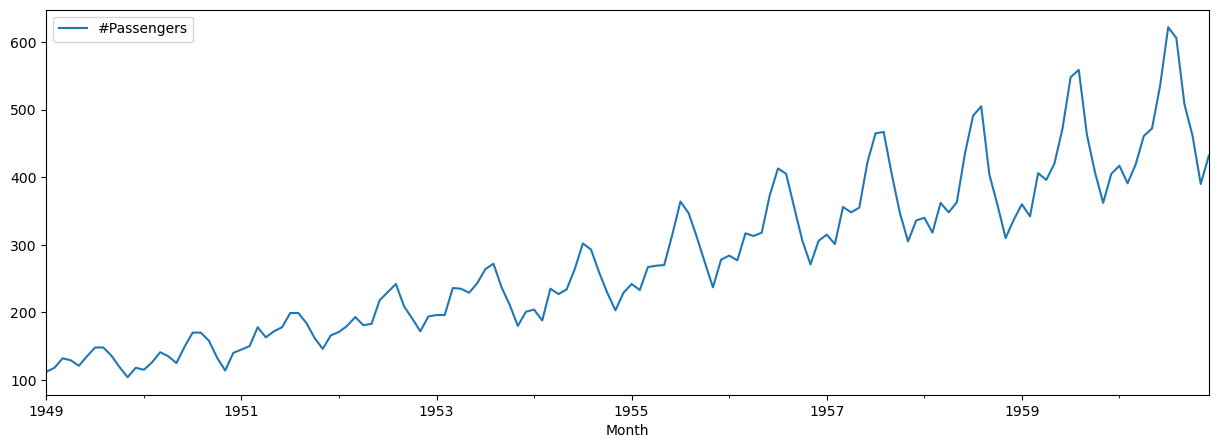

In [65]:
df.plot(figsize=(15, 5))

<AxesSubplot: xlabel='Month'>

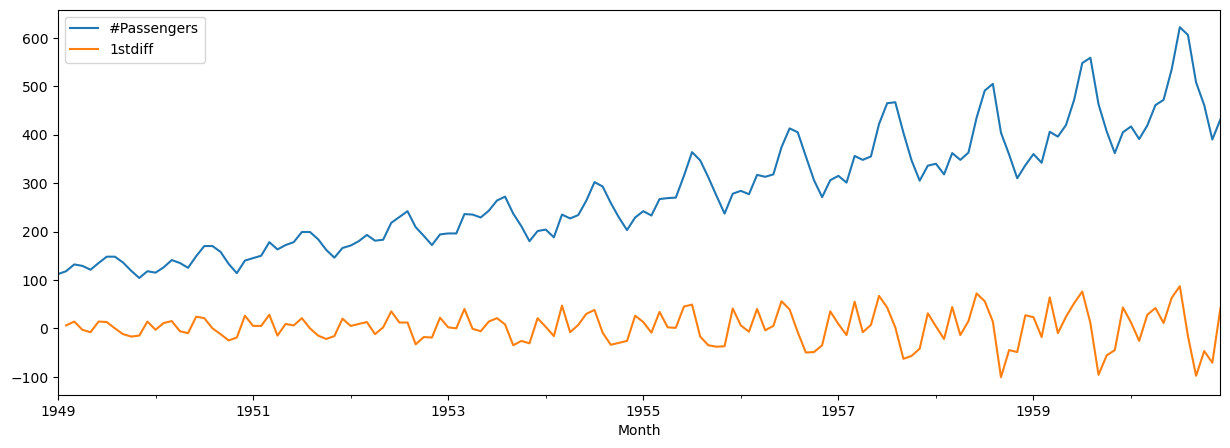

In [66]:
#Differencia de primer orden
df['1stdiff'] = df['#Passengers'].diff()
df.plot(figsize=(15, 5))

No es estacionarioa ya que tiene estacionalidad que crece con el tiempo

<AxesSubplot: xlabel='Month'>

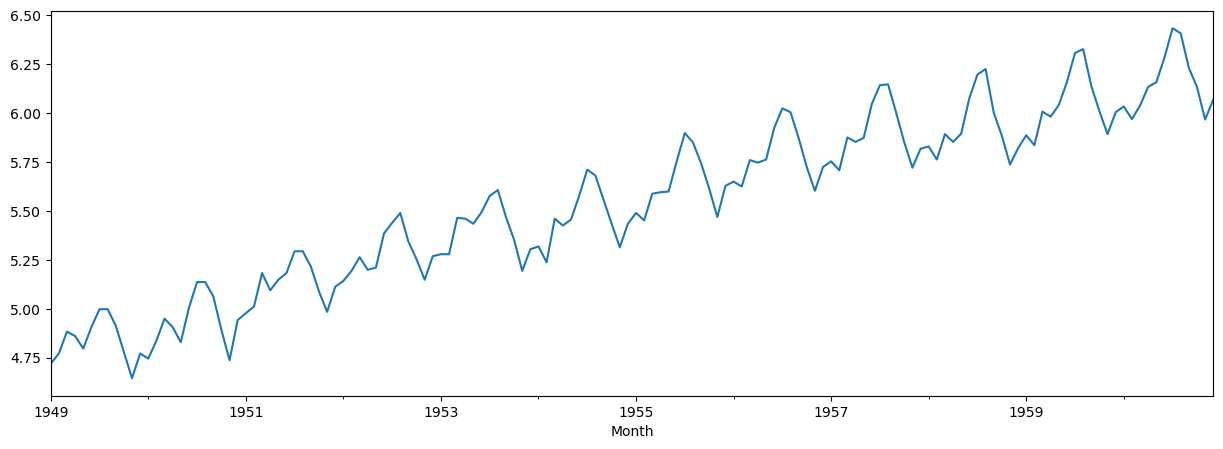

In [67]:
df['LogPassengers'] = np.log(df['#Passengers'])
df['LogPassengers'].plot(figsize=(15, 5))

Crece mas lento yla estacionalidad es casi constante

In [68]:
from statsmodels.tsa.arima.model import ARIMA


In [69]:
# Train a tes data
df.index.freq = 'MS'
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

<AxesSubplot: xlabel='Month'>

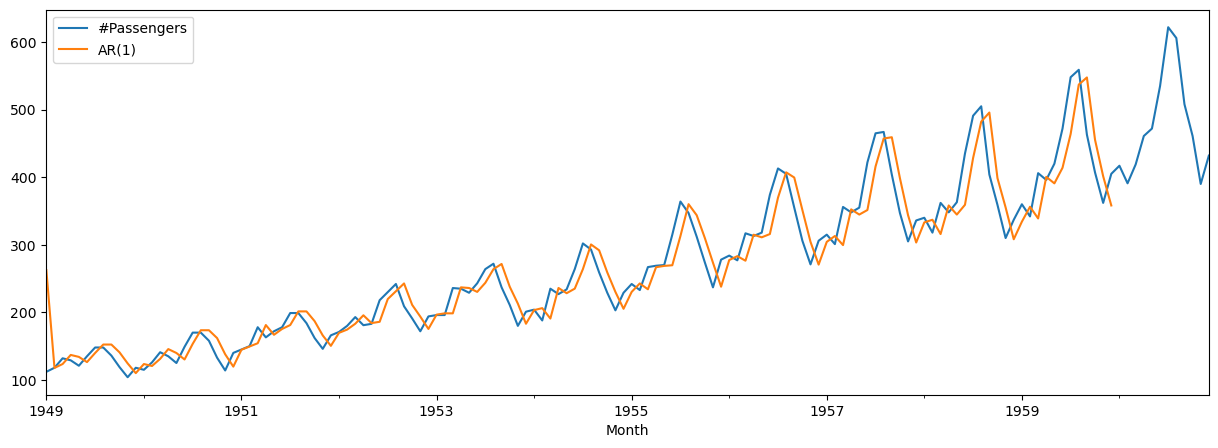

In [70]:
#ARIMA(p,d,q)->order(1,0,0)=AR(1)
arima = ARIMA(train['#Passengers'], order=(1,0,0))
#fit de lapredicción de arima sobrelosdatos de passenger
arima_result = arima.fit()
#guardar valor
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start=train.index[0], end=train.index[-1])
#graficar train 
df[['#Passengers', 'AR(1)']].plot(figsize=(15, 5))

<AxesSubplot: xlabel='Month'>

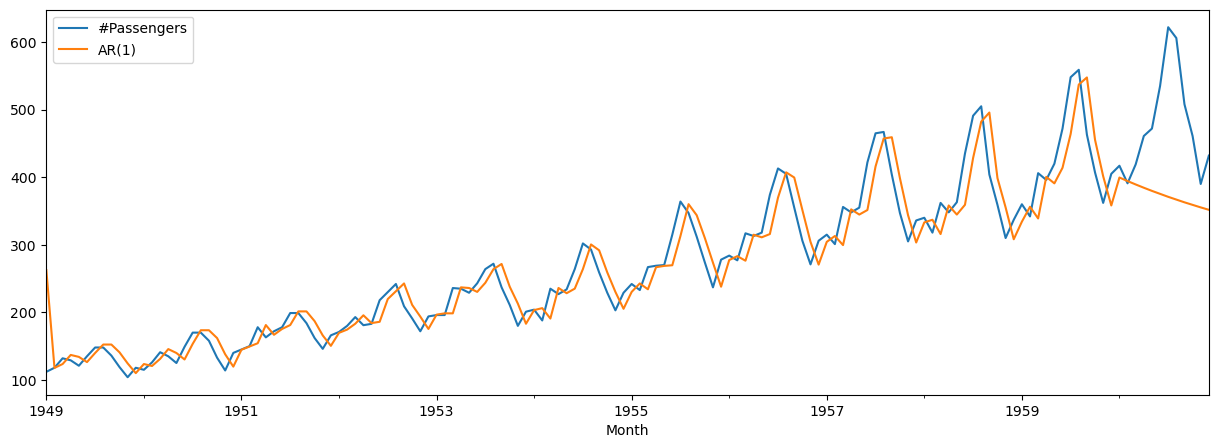

In [71]:
#Predicción de ARIMA para los datosde prueba
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
#type(prediction_result)
#guardar valor
df.loc[test_idx, 'AR(1)'] = forecast
#graficar
df[['#Passengers', 'AR(1)']].plot(figsize=(15, 5))

Muy mala predicción, va en ladirección opuesta. La predicción Naive era mejor

In [72]:
#Intervalo de confianza
prediction_result.conf_int()

,lower #Passengers,upper #Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [73]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df['#Passengers'], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower #Passengers'], conf_int['upper #Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

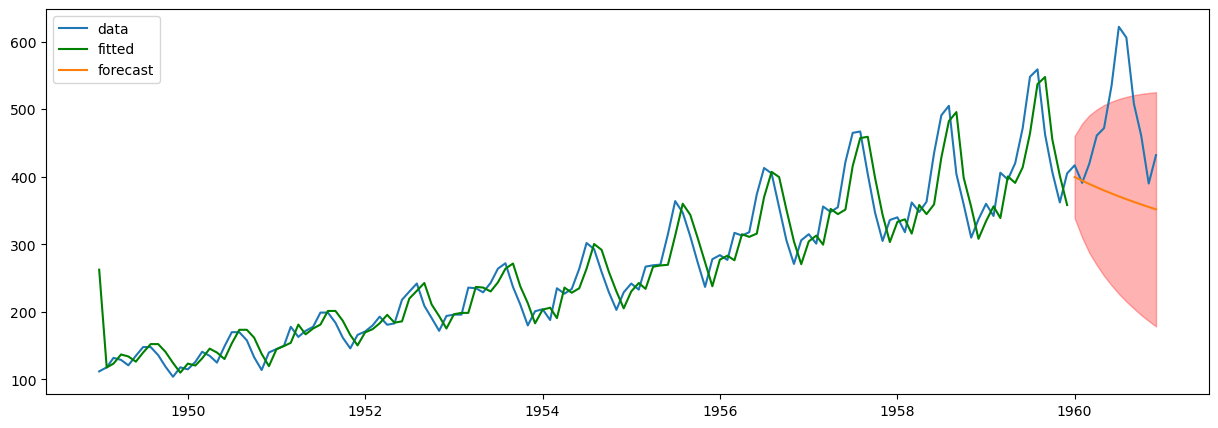

In [74]:
plot_fit_and_forecast(arima_result)

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


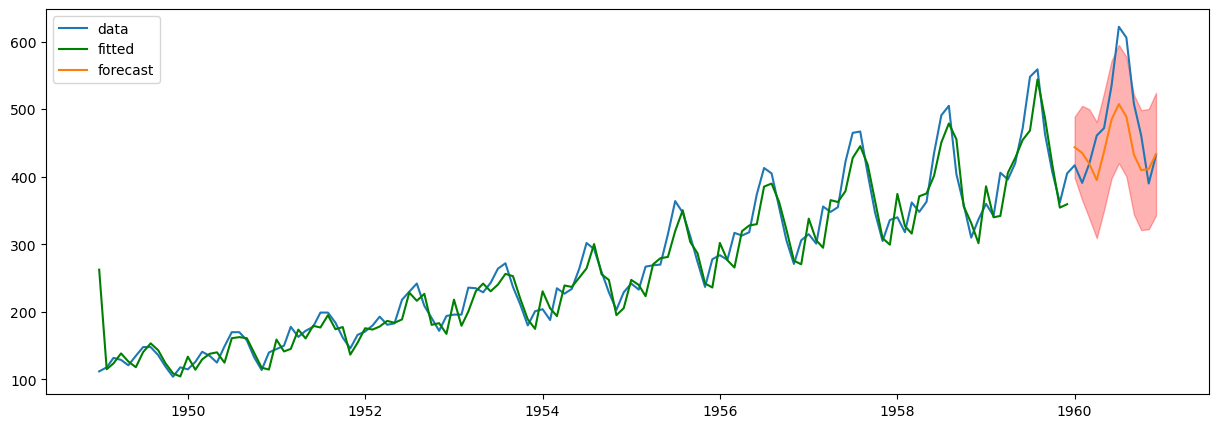

In [75]:
#ARIMA(p,d,q)->order(10,0,0)=AR(10)
arima = ARIMA(train['#Passengers'], order=(10,0,0)) # AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

El modeloaprende que la señal es periódica, 
pero subestimada

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


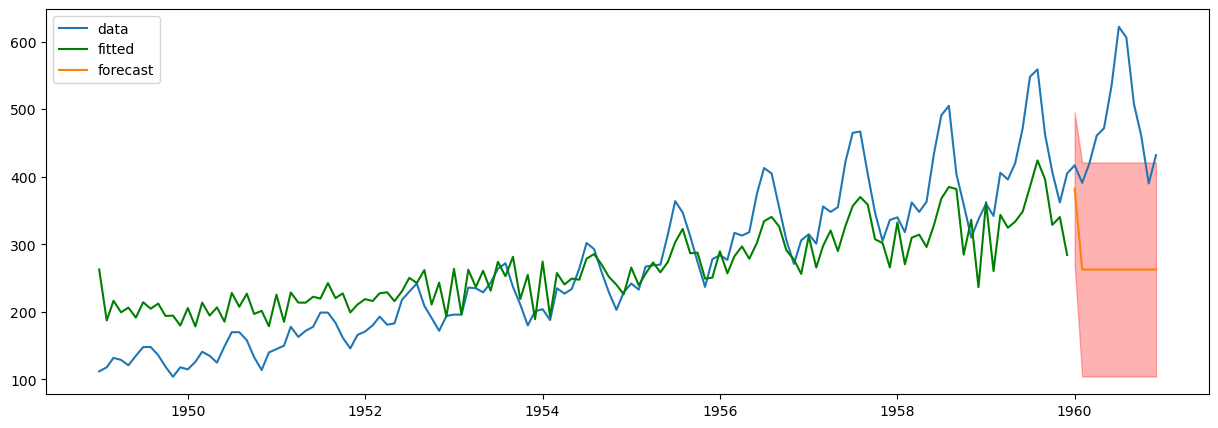

In [76]:
#ARIMA(p,d,q)->order(0,0,1)=MA(1)
arima = ARIMA(train['#Passengers'], order=(0,0,1)) # MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

Peor que AR(1)

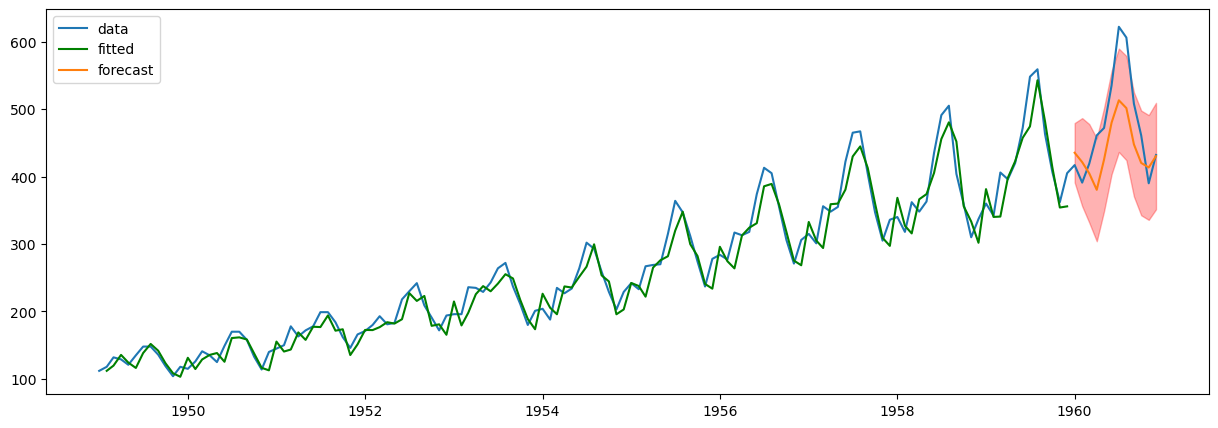

In [35]:
arima = ARIMA(train['#Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()
#Función con 3 parámetros
def plot_fit_and_forecast_int(result, d, col='#Passengers'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

## Que pasa si ahora utilizamos log?

<AxesSubplot: xlabel='Month'>

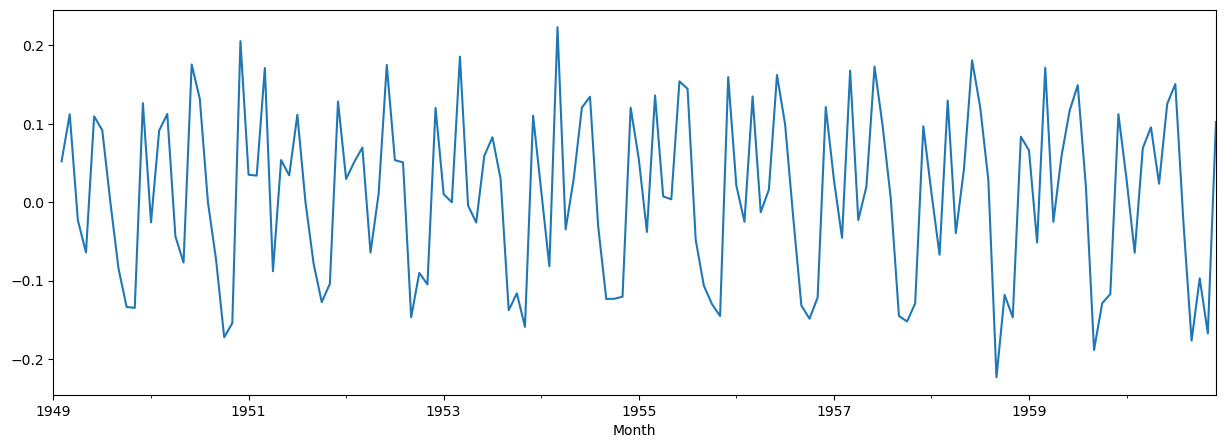

In [78]:
#Differencia de primer orden log
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot(figsize=(15, 5))

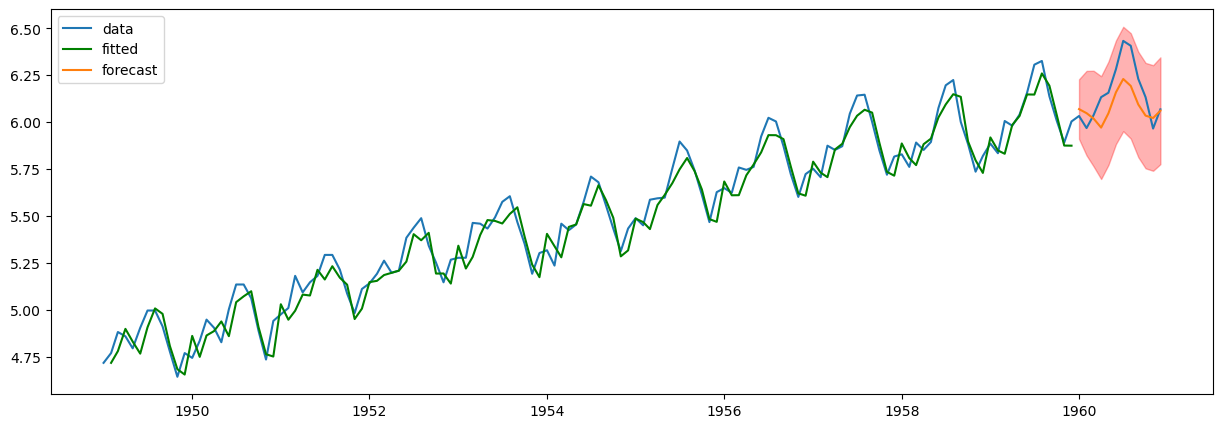

In [36]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

Peor resultado que los datos sin log

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


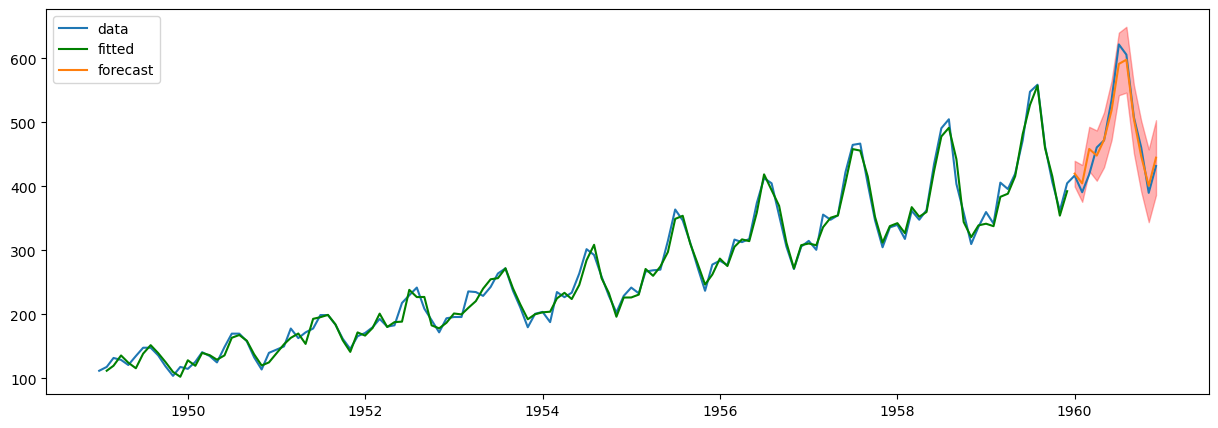

In [80]:
#Mas terminos (12 = tamaño delperiodo)
arima = ARIMA(train['#Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='#Passengers')

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


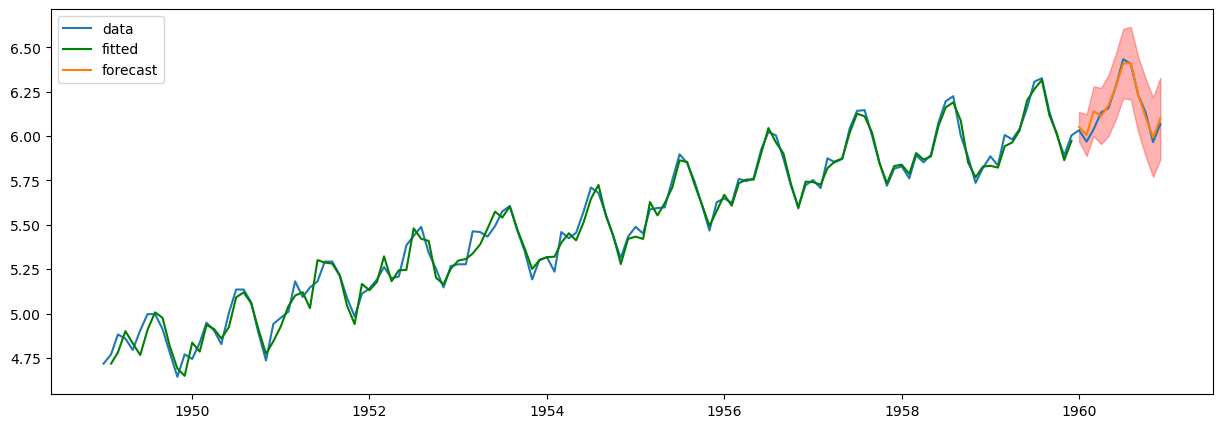

In [39]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [82]:
#Métrica
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
#Escala original
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['#Passengers']
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [43]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.0645854100058
ARIMA(8,1,1) logged: 61.60087095199148
ARIMA(12,1,0): 17.492990271039854
ARIMA(12,1,0) logged: 16.138224592139064


ARIMA(12,1,0) log es la mejor predicción!!!!!

# Estacionalidad

ADF test: https://support.minitab.com/es-mx/minitab/21/help-and-how-to/statistical-modeling/time-series/how-to/augmented-dickey-fuller-test/methods-and-formulas/methods-and-formulas/

https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html




In [142]:
'''
Augmented Dickey-Fuller test 

statsmodels.tsa.stattools.adfuller(
    x,                #data
    maxlag=None, 
    regression='c', 
    autolag='AIC', 
    store=False, 
    regresults=False)

return:
(adf,
pvalue,
usedlag,   
nobs,      #number of observations used 
critical value, #Based on MacKinnon (2010)
icbest  #The maximized information criterion 
        if autolag is not None.
)
'''
from statsmodels.tsa.stattools import adfuller


"\nAugmented Dickey-Fuller test \n\nstatsmodels.tsa.stattools.adfuller(\n    x,                #data\n    maxlag=None, \n    regression='c', \n    autolag='AIC', \n    store=False, \n    regresults=False)\n\nreturn:\n(adf,\npvalue,\nusedlag,   \nnobs,      #number of observations used \ncritical value, #Based on MacKinnon (2010)\nicbest  #The maximized information criterion \n        if autolag is not None.\n)\n"

<AxesSubplot: xlabel='Month'>

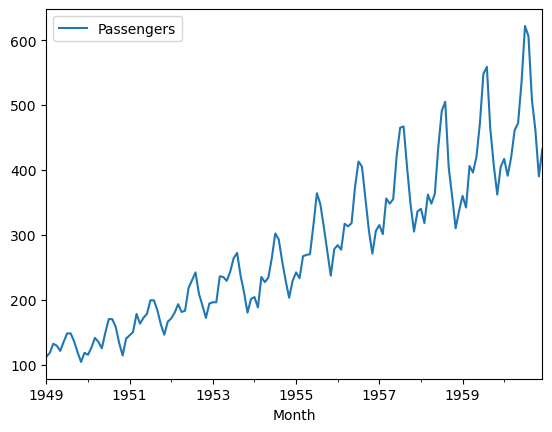

In [143]:
df = pd.read_csv('../datasets/airline_passengers.csv', index_col='Month', parse_dates=True)
df.plot()

In [105]:
adfuller(df['Passengers'])

(0.8153688792060655,
 0.9918802434376413,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [112]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05: #5%
    print("Stationary")
  else:
    print("Non-Stationary")

In [92]:
adf(df['Passengers'])


Test-Statistic: 0.8153688792060655
P-Value: 0.9918802434376413
Non-Stationary


Test-Statistic: -9.262650252678505
P-Value: 1.393644465307259e-15
Stationary


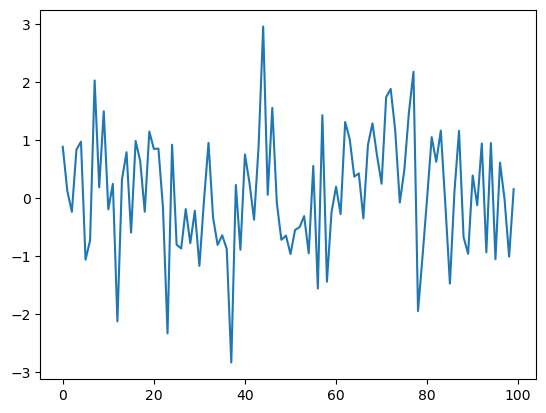

In [135]:
rand = np.random.randn(100)
plt.plot(rand)
adf(rand)

Test-Statistic: -4.226161411345069
P-Value: 0.000594840482819206
Stationary


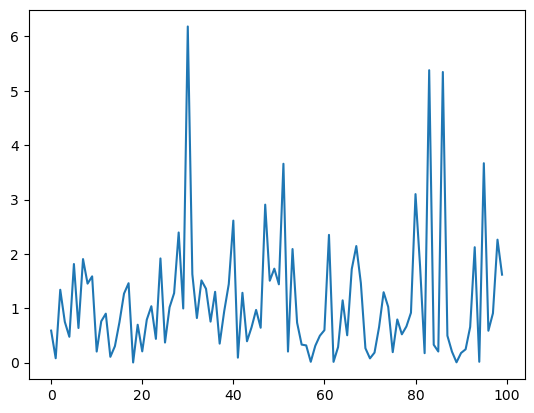

In [136]:
gama = np.random.gamma(1, 1, 100)
plt.plot(gama)
adf(gama)

In [137]:
df['LogPassengers'] = np.log(df['Passengers'])

In [138]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069616
P-Value: 0.4223667747703909
Non-Stationary


Test-Statistic: -2.8292668241700025
P-Value: 0.05421329028382508
Non-Stationary


<AxesSubplot: xlabel='Month'>

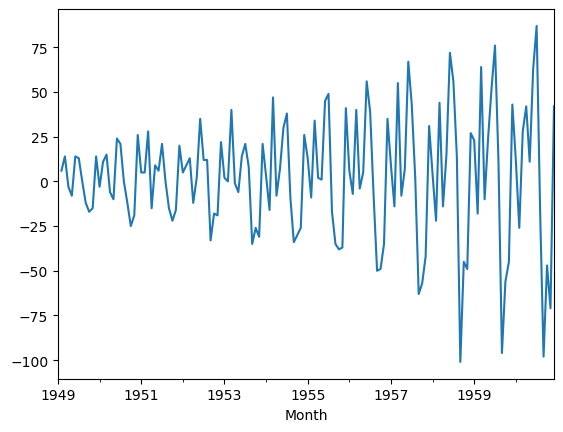

In [140]:
#Usamos en el ajuste de ARIMA
df['Diff'] = df['Passengers'].diff()
adf(df['Diff'].dropna())
df['Diff'].plot()

Test-Statistic: -2.7171305983881204
P-Value: 0.07112054815086076
Non-Stationary


<AxesSubplot: xlabel='Month'>

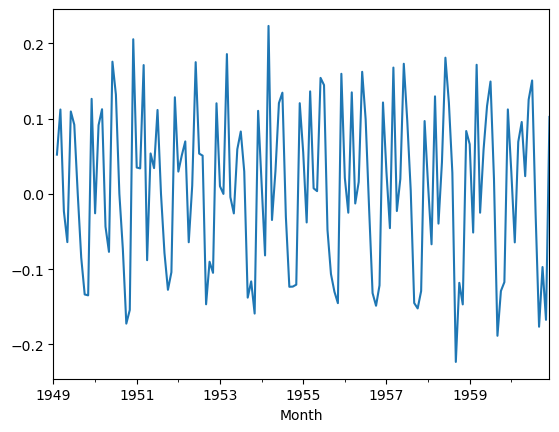

In [141]:
df['DiffLog'] = df['LogPassengers'].diff()
adf(df['DiffLog'].dropna())
df['DiffLog'].plot()